# Problem 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint, trapz, simps
import warnings
warnings.filterwarnings("ignore")

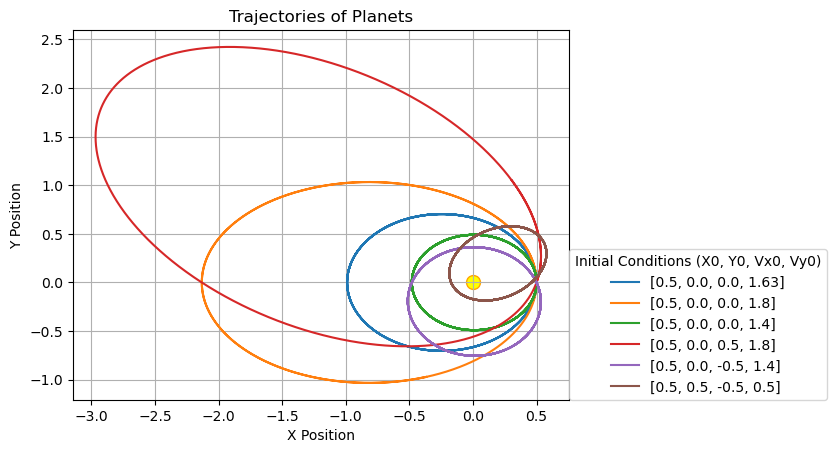

In [3]:
# Given constant and initial conditions
GM = 1

initial_conditions = [
    [0.5, 0.0, 0.0, 1.63],
    [0.5, 0.0, 0.0, 1.80],
    [0.5, 0.0, 0.0, 1.40],
    [0.5, 0.0, 0.50, 1.80],
    [0.5, 0.0, -0.50, 1.40],
    [0.5, 0.50, -0.50, 0.50]
]

# Defining equation of motion using position, velocity and acceleration
def equations_of_motion(state, t):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    ax = -GM * x / r**3
    ay = -GM * y / r**3
    return [vx, vy, ax, ay]

# Plotting trajectories for each initial condtion
for i in initial_conditions:
    t = np.linspace(0, 18, 1800)  # time points
    states = odeint(equations_of_motion, i, t)
    x_values = states[:, 0]
    y_values = states[:, 1]
    plt.plot(x_values, y_values)
    
plt.scatter(x=0.0, y=0.0,s=100, color='yellow',edgecolors='orange')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Trajectories of Planets')
plt.legend(title="Initial Conditions (X0, Y0, Vx0, Vy0)",loc=(1,0),labels=initial_conditions)
plt.grid()
plt.show()

Would be great if you explained how did you arrived at the acceleration using analytical method.

# Problem 2

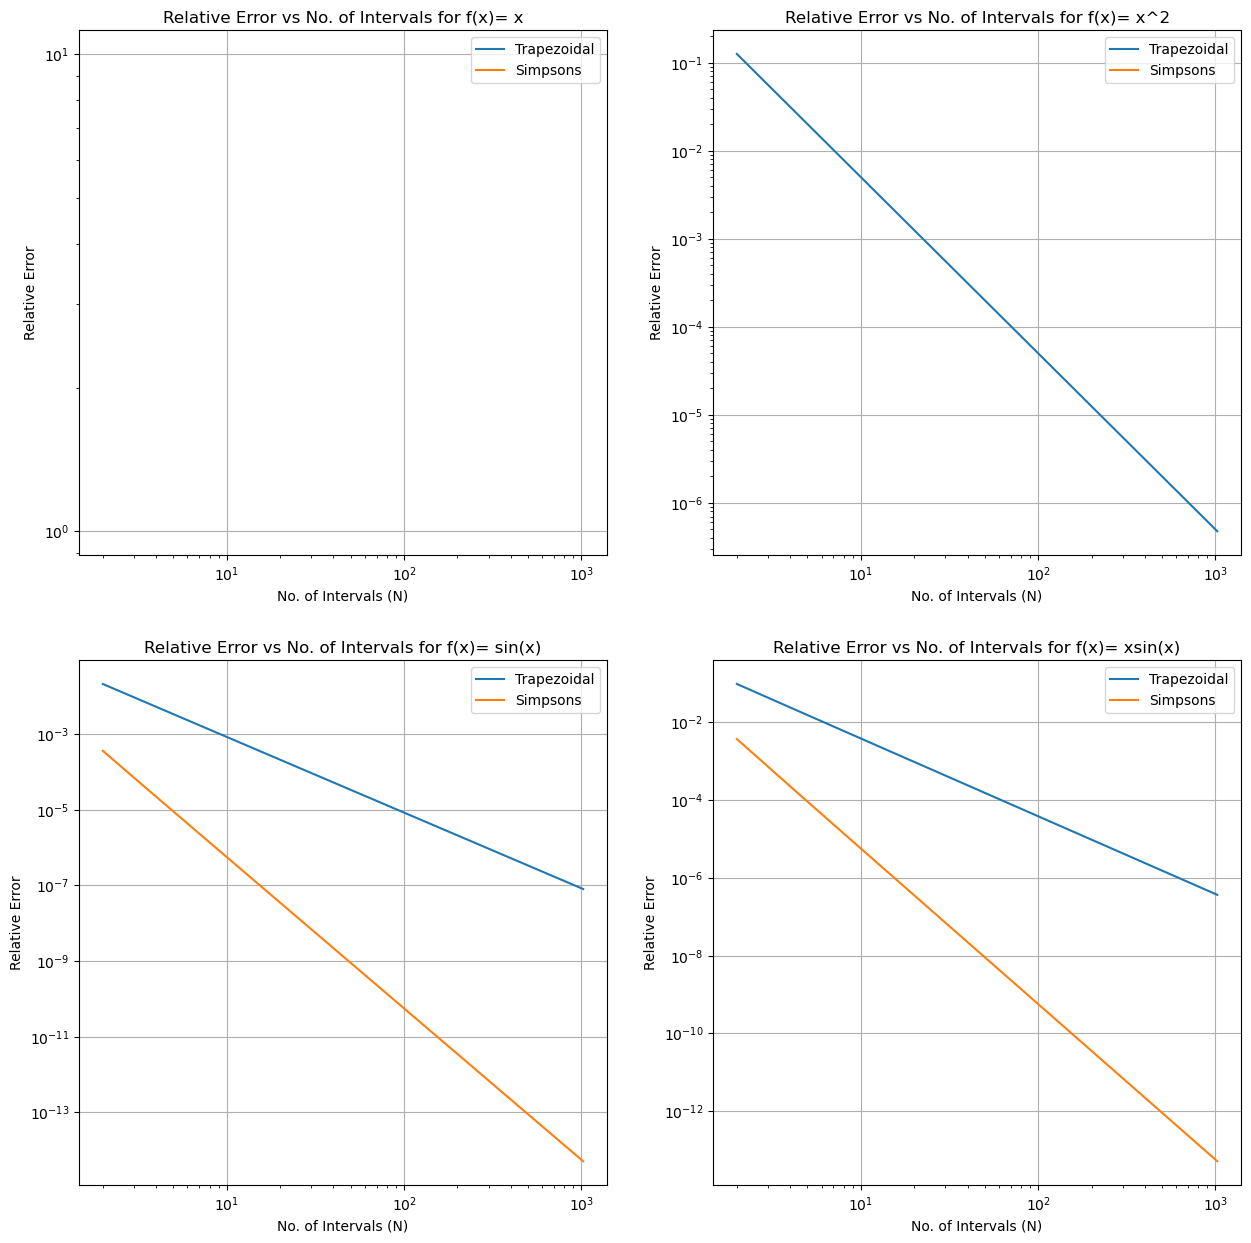

In [4]:
# Function to perform numerical integration using Trapezoidal rule
def trapezoid(func, a, b, N):
    global x_values
    x_values = np.linspace(a, b, N+1)
    global y_values
    y_values = func(x_values)
    return trapz(y_values, dx=(b - a) / N)

# Function to perform numerical integration using Simpson's rule
def simpsons(func, a, b, N):
    x_values = np.linspace(a, b, N+1)
    y_values = func(x_values)
    return simps(y_values, dx=(b - a) / N)

# Define the functions to integrate
def func1(x):
    """x"""
    return x

def func2(x):
    """x^2"""
    return x**2

def func3(x):
    """sin(x)"""
    return np.sin(x)

def func4(x):
    """xsin(x)"""
    return x * np.sin(x)

# Answers of the integrals solves using analytical method
analytical_anss = [0.5, 1/3, 1 - np.cos(1), np.sin(1) - np.cos(1)]

# List of the function to iterate over
functions = [func1, func2, func3, func4]

# Dictionary for storing relative errors for each function occurring due to consequence of using Simpsons and Trapezoidal Method
error_dict={}

# The chunk of code given below"
# Iterates through each of the function from the given list of function
# Calculates integral for each function from the list for trapezoidal and simpsons rule
# Calculates the relative error for each function for each rule and stores them in a dictionary
# Uses the function's docstring as a key for assigned to the values 
# The relative error is stored as a 2D array of 0th for trapezoidal and 1st for simpsons

for func in functions :
    trap_error_func=[]
    simps_error_func=[]
    for i in range(1,11):
        trap_ans = trapezoid(func, 0, 1, N=2**i)
        simps_ans = simpsons(func, 0, 1, N=2**i)
        analytical_ans = analytical_anss[functions.index(func)]
        #print("Trap Answer:",trap_ans,", Relative Error:", abs((trap_ans-analytical_ans)/analytical_ans))
        trap_error_func.append(abs((trap_ans-analytical_ans)/analytical_ans))
        #print("Simps Answer:",simps_ans,", Relative Error:", abs((simps_ans-analytical_ans)/analytical_ans))
        simps_error_func.append(abs((simps_ans-analytical_ans)/analytical_ans))
    error_dict[func.__doc__]=[trap_error_func,simps_error_func]

# The chunk of code contains everything we need to compare the relationship between the errors 
# The keys of the dictionary are converted into a list to iterate over using t as an index
# Using subplot to set a an empty grid and filling the each [i,j] th box with respective plots of the function
# The scale has been changed to log scale to observe variations properly
func = list(error_dict.keys())
t=0
fig, axes = plt.subplots(2,2, figsize=(15, 15))
for i in [0, 1]:
    for j in [0,1]:
        axes[i,j].plot([2**i for i in range(1,11)], error_dict[func[t]][0])
        axes[i,j].plot([2**i for i in range(1,11)], error_dict[func[t]][1])
        axes[i,j].legend(['Trapezoidal', 'Simpsons'])
        axes[i,j].set_xscale('log')
        axes[i,j].set_yscale('log')
        axes[i,j].set_title('Relative Error vs No. of Intervals for f(x)= '+func[t])
        axes[i,j].set_ylabel('Relative Error')
        axes[i,j].set_xlabel('No. of Intervals (N)')
        axes[i,j].grid(True)
        t=t+1

for simpsons the error falls more rapidly

# Problem 3
The solution for analytical approach is given in the report

In [5]:
import numpy as np
from scipy.integrate import quad

# Define the integrand function
def integrand(x):
    return np.sin(x)**2 / x**2

# Numerical integration using quad
result, _ = quad(integrand, -np.inf, np.inf)

print("Numerical result:", result)
print("Analytical result:", np.pi)
# use this method only sinceit gives appropriate results

error = abs((result-np.pi)/np.pi)
print("Relative Error:",error)

Numerical result: 3.1417357698907553
Analytical result: 3.141592653589793
Relative Error: 4.5555333470322475e-05


For report solve the integrals analytically using the you tube channel and your notes

# Problem 4

In [6]:
import numpy as np
from scipy.special import roots_legendre

# Define the integrand function
def f(x):
    return x**2 * np.exp(-x**2)

# Define the limits of integration
a = -1
b = 1

# Define the number of points for Gaussian quadrature
num_points = [2, 3, 5]

# Compute the integral using Gaussian quadrature
for n in num_points:
    # Get the roots and weights for Gaussian quadrature
    x, w = roots_legendre(n)

    # Map the integration limits from -1 to 1 to the actual limits
    t = 0.5 * (x + 1) * (b - a) + a

    # Compute the integral using the quadrature formula
    integral = np.sum(w * f(t)) * 0.5 * (b - a)

    # Print the result
    print(f"The integral using {n}-point Gaussian quadrature is: {integral}")

The integral using 2-point Gaussian quadrature is: 0.47768754038252614
The integral using 3-point Gaussian quadrature is: 0.36587442406268444
The integral using 5-point Gaussian quadrature is: 0.37887323886553764


In [10]:
import numpy as np
from scipy import integrate

# Define the integrand function
def f(x):
    return x**2 * np.exp(-(x**2))

# 2-point Gaussian Quadrature
result_2pt, _ = integrate.fixed_quad(f, -1, 1, n=2)
print("2-point Gaussian Quadrature result:", result_2pt)

# 3-point Gaussian Quadrature
result_3pt, _ = integrate.fixed_quad(f, -1, 1, n=3)
print("3-point Gaussian Quadrature result:", result_3pt)

# 5-point Gaussian Quadrature
result_5pt, _ = integrate.fixed_quad(f, -1, 1, n=5)
print("5-point Gaussian Quadrature result:", result_5pt)

2-point Gaussian Quadrature result: 0.47768754038252614
3-point Gaussian Quadrature result: 0.36587442406268444
5-point Gaussian Quadrature result: 0.37887323886553764


In [8]:
f(1/(3**0.5))

0.23884377019126313

In [29]:
f(-1/(3**0.5))*2

0.47768754038252625

In [18]:
x=-(3/5)**(0.5)
y1 = (x**2)*(np.exp(-x**2))
y1

0.3292869816564159

In [30]:
(3/5)**(0.5)

0.7745966692414834

In [19]:
x=0
y2= (x**2)*(np.exp(-x**2))
y2

0.0

In [20]:
x=(3/5)**(0.5)
y3 = (x**2)*(np.exp(-x**2))
y3

0.3292869816564159

In [21]:
(5/9)*y1+(8/9)*y2+(5/9)*y3

0.36587442406268433

In [3]:
# Final Soluion for 4.1
# though calculate the analytical integral to compare the values (also do it directly using other functions e.g. simpy)
# write analytical solution in the book
import numpy as np

# Define the integrand function
def f(x):
    return x**2 * np.exp(-(x**2))

# Number of points for Gaussian Quadrature
for n in [2,3,5]:
    # Calculate nodes and weights using Legendre polynomial
    nodes, weights = np.polynomial.legendre.leggauss(n)
    print(nodes, weights)
    # Calculate the integral approximation
    result = sum(weights * f(nodes))
    print(f"{n}-point Gaussian Quadrature result:", result)
    print("\n")

[-0.57735027  0.57735027] [1. 1.]
2-point Gaussian Quadrature result: 0.47768754038252614


[-0.77459667  0.          0.77459667] [0.55555556 0.88888889 0.55555556]
3-point Gaussian Quadrature result: 0.36587442406268444


[-0.90617985 -0.53846931  0.          0.53846931  0.90617985] [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]
5-point Gaussian Quadrature result: 0.3788732388655378




In [4]:
import sympy as sp

# Define the symbol
x = sp.symbols('x')

# Define the integrand
integrand = x**2 * sp.exp(-x**2)

# Integrate the integrand over the given limits
result = sp.integrate(integrand, (x, -1, 1))

print("Result of the integral:", result) # find this answer analytically
numerical_result = result.evalf()
print("Numerical result:", numerical_result)


Result of the integral: -exp(-1) + sqrt(pi)*erf(1)/2
Numerical result: 0.378944691640985


We are using Legendre Gaussian Polynomials or whatever since the limits runs from -1 to 1 and that one is used more often. mention the formula for calculating using this method for each point or write a general expression in the report. write how it calculates the nodes and weights without knowing the function since it can work for wide range of function.

#### Problem 4.2

In [7]:
import numpy as np
from scipy import integrate

# Function to be integrated
def integrand(x):
    return np.sqrt(1 + (np.cos(x))**2)

# Calculate the integral using numerical integration
result, _ = integrate.quad(integrand, 0, np.pi)


print("Approximate integral result:", result)

Approximate integral result: 3.8201977890277115


In [8]:
import numpy as np
from scipy import integrate

# Analytical value of arc length
analytical_arc_length = 0.0

# Function to be integrated
def integrand(x):
    return np.sqrt(2 - (np.sin(x))**2)

# 2-point Gaussian Quadrature
result_2pt, _ = integrate.fixed_quad(integrand, 0, np.pi, n=2)

# 3-point Gaussian Quadrature
result_3pt, _ = integrate.fixed_quad(integrand, 0, np.pi, n=3)

# 5-point Gaussian Quadrature
result_5pt, _ = integrate.fixed_quad(integrand, 0, np.pi, n=5)

# Calculate percentage error
def percentage_error(true_value, approx_value):
    return ((approx_value - true_value) / true_value) * 100

print("2-point Gaussian Quadrature result:", result_2pt)


print("3-point Gaussian Quadrature result:", result_3pt)

print("5-point Gaussian Quadrature result:", result_5pt)

2-point Gaussian Quadrature result: 3.9989762910745306
3-point Gaussian Quadrature result: 3.7892054214626487
5-point Gaussian Quadrature result: 3.8187923611667065


Since the two numerical answers are closer the we have to calculate the analytical answer which lies somewhere near it using this you tube link for elliptic integral [you tube](https://www.youtube.com/watch?v=eosI-oJVQ84)